# Lesson 3.2 数据生成器与Python模块编写

&emsp;&emsp;在有了相关性理论基础之后，我们即可创建一个可用于回归模型实验的数据生成器。

In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

## 一、自定义数据生成器

&emsp;&emsp;为了方便后续练习的展开，我们尝试自己创建一个数据生成器，用于自主生成一些符合某些条件、难度可控、具备某些特性的数据集。机器学习发展至今，在追求模型效果提升的过程中，模型本身可解释性逐渐变弱，对于很多集成类算法，很多模型构建思路也在朝向深度学习靠拢。这使得很多模型内部逐渐呈现灰箱甚至是黑箱的状态。但是，在初学过程中，我们仍然需要通过类似控制变量的方法、通过设计一些实验，去深入理解算法运行原理及一些优化方法的实际作用，这就需要我们自己动手，创建一些数据用于实验的原材料，通过一些实验深入了解模型原理，从“炼丹师”朝着“化学家”更进一步。

> 和Lesson 1中介绍的一样，课程中案例分为三类，分别是基础阶段的手动创建数据集、实战阶段的竞赛数据集和企业应用实战阶段的企业数据集。

### 1.手动生成数据

&emsp;&emsp;我们先尝试生成两个特征、存在偏差，自变量和因变量存在线性关系的数据集

In [2]:
num_inputs = 2               # 两个特征
num_examples = 1000          # 总共一千条数据

然后尝试通过线性方程，确定自变量和因变量的真实关系

In [3]:
np.random.seed(24)       # 设置随机数种子

In [4]:
np.random.randn(2, 2)

array([[ 1.32921217, -0.77003345],
       [-0.31628036, -0.99081039]])

In [5]:
# 线性方程系数
w_true = np.array([2, -1]).reshape(-1, 1) # 设置weight
b_true = np.array(1)

# 扰动项相关
delta = 0.01

# 创建数据集的特征和标签取值
features = np.random.randn(num_examples, num_inputs)
labels_true = features.dot(w_true) + b_true # 因为b_true是标量，加载一个向量后面，起到广播作用
labels = labels_true + np.random.normal(size = labels_true.shape) * delta # 加上随机扰动项

In [ ]:
features

In [ ]:
labels_true

注意，此时labels_true和features满足严格意义上的线性方程关系

$$y = 2x_1-x_2+1$$

但我们实际使用的标签labels，则是在labels_true的基础上增添了一个扰动项，`np.random.normal(size = labels_true.shape) * delta`，这其实也符合我们一般获取数据的情况：真实客观世界或许存在某个规律，但我们搜集到的数据往往会因为各种原因存在一定的误差，无法完全描述真实世界的客观规律，这其实也是模型误差的来源之一（另一个误差来源是模型本身捕获规律的能力）。这其中，$y=2x_1-x_2+1$相当于我们从上帝视角创建的数据真实服从的规律，而扰动项，则相当于人为创造的获取数据时的误差。  

简单查看我们创建的数据集

In [8]:
features[: 10]

array([[-1.07081626, -1.43871328],
       [ 0.56441685,  0.29572189],
       [-1.62640423,  0.2195652 ],
       [ 0.6788048 ,  1.88927273],
       [ 0.9615384 ,  0.1040112 ],
       [-0.48116532,  0.85022853],
       [ 1.45342467,  1.05773744],
       [ 0.16556161,  0.51501838],
       [-1.33693569,  0.56286114],
       [ 1.39285483, -0.06332798]])

In [9]:
labels[: 10]

array([[ 0.29161817],
       [ 1.83851813],
       [-2.46058022],
       [ 0.44394438],
       [ 2.8133944 ],
       [-0.8109745 ],
       [ 2.85143778],
       [ 0.83156296],
       [-2.22624102],
       [ 3.84279053]])

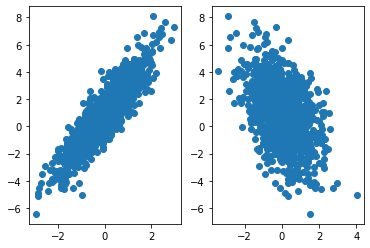

In [12]:
plt.subplot(121)
plt.scatter(features[:, 0], labels)          # 第一个特征和标签的关系
plt.subplot(122)
plt.scatter(features[:, 1], labels)          # 第二个特征和标签的关系

不难看出，两个特征和标签都存在一定的线性关系，并且跟特征的系数绝对值有很大关系。当然，若要增加线性模型的建模难度，可以增加扰动项的数值比例，从而削弱线性关系。

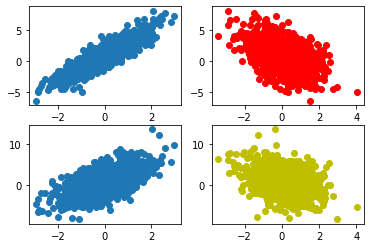

In [13]:
# 设置随机数种子
np.random.seed(24)   

# 修改因变量
labels1 = labels_true + np.random.normal(size = labels_true.shape) * 2

# 可视化展示

# 扰动较小的情况
plt.subplot(221)
plt.scatter(features[:, 0], labels)             # 第一个特征和标签的关系
plt.subplot(222)
plt.plot(features[:, 1], labels, 'ro')          # 第二个特征和标签的关系

# 扰动较大的情况
plt.subplot(223)
plt.scatter(features[:, 0], labels1)             # 第一个特征和标签的关系
plt.subplot(224)
plt.plot(features[:, 1], labels1, 'yo')          # 第二个特征和标签的关系

当然，我们也能生成非线性关系的数据集，此处我们创建满足$y=2x^2+1$规律的数据集。

In [14]:
np.power([2, 3], 2)

array([4, 9])

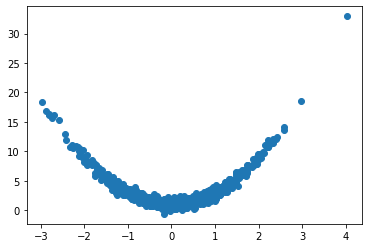

In [17]:
# 设置随机数种子
np.random.seed(24)   

num_inputs = 1               # 一个特征
num_examples = 1000          # 总共一千条数据

# 线性方程系数
w_true = np.array(2)
b_true = np.array(1)

# 特征和标签取值
features = np.random.randn(num_examples, num_inputs)
labels_true = np.power(features, 2) * w_true + b_true
labels = labels_true + np.random.normal(size = labels_true.shape) * 0.5

# 可视化展示
plt.scatter(features, labels)

> 关于曲线相关，其实也可将其转化为线性相关，例如上例中，我们只需要新增一列$x_2=x$即可构建一个线性模型$y=x_2+1$，该方法也是特征工程中的一种特征衍生的方法。

&emsp;&emsp;此时需要注意的是，无论是创建了曲线规律的数据集，还是增加了扰动项绝对数值，都会对建模造成困难。但二者的造成困难的方式是不同的。如果是曲线规律的数据集，则代表规律本身更加复杂，此时需要使用更加复杂的模型来进行规律提取，该部分属于模型选取和参数调优的技术内容；而如果是扰动项比较大，则代表规律被掩盖的比较深，此时需要采用其他技术手段进行白噪声的处理，该部分属于特征工程技术内容。但本节内，无论是曲线规律还是白噪声数值过大，都会对线性方程建模造成困难。

> 这也就是控制数据集建模难度的最基础的抓手。

### 2.创建生成回归类数据的函数

&emsp;&emsp;为了方便后续使用，我们将上述过程封装在一个函数内

- 定义创建函数

In [18]:
A = np.arange(4).reshape(2, 2)
A

array([[0, 1],
       [2, 3]])

In [19]:
np.power(A, 3)

array([[ 0,  1],
       [ 8, 27]])

In [20]:
A.dot(2)

array([[0, 2],
       [4, 6]])

In [21]:
np.ones_like(A)

array([[1, 1],
       [1, 1]])

In [22]:
def arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 0.01, deg = 1):
    """回归类数据集创建函数。

    :param num_examples: 创建数据集的数据量
    :param w: 包括截距的（如果存在）特征系数向量
    :param bias：是否需要截距
    :param delta：扰动项取值
    :param deg：方程最高项次数
    :return: 生成的特征数组和标签数组
    """
    
    if bias == True:
        num_inputs = len(w)-1                              # 数据集特征个数
        features_true = np.random.randn(num_examples, num_inputs)            # 原始特征
        w_true = np.array(w[:-1]).reshape(-1, 1)                     # 自变量系数
        b_true = np.array(w[-1])                              # 截距
        labels_true = np.power(features_true, deg).dot(w_true) + b_true         # 严格满足人造规律的标签
        features = np.concatenate((features_true, np.ones_like(labels_true)), axis=1)   # 加上全为1的一列之后的特征，便于后面运算
    else: 
        num_inputs = len(w)
        features = np.random.randn(num_examples, num_inputs) 
        w_true = np.array(w).reshape(-1, 1)         
        labels_true = np.power(features, deg).dot(w_true)

    labels = labels_true + np.random.normal(size = labels_true.shape) * delta
    return features, labels

> 注：上述函数默认创建的是一个满足$y=2x_1-x_2+1$的数据集。

- 测试函数性能

首先查看扰动项较小的时候的数据情况

In [23]:
# 设置随机数种子
np.random.seed(24)   

# 扰动项取值为0.01
f, l = arrayGenReg(delta=0.01)

f

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       ...,
       [ 1.5507578 , -0.35986144,  1.        ],
       [-1.36267161, -0.61353562,  1.        ],
       [-1.44029131,  0.50439425,  1.        ]])

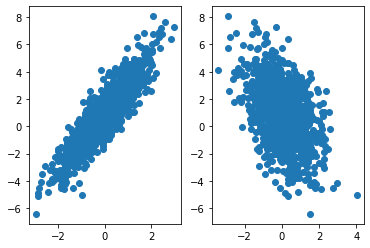

In [24]:
# 绘制图像查看结果
plt.subplot(121)
plt.scatter(f[:, 0], l)             # 第一个特征和标签的关系
plt.subplot(122)
plt.scatter(f[:, 1], l)             # 第二个特征和标签的关系

然后查看扰动项较大时数据情况

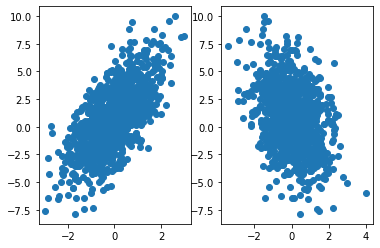

In [25]:
# 设置随机数种子
np.random.seed(24)   

# 扰动项取值为2
f, l = arrayGenReg(delta=2)

# 绘制图像查看结果
plt.subplot(121)
plt.scatter(f[:, 0], l)             # 第一个特征和标签的关系
plt.subplot(122)
plt.scatter(f[:, 1], l)             # 第二个特征和标签的关系

当特征和标签满足二阶关系时候数据表现

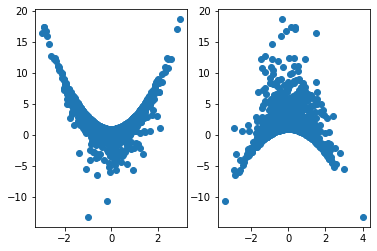

In [26]:
# 设置随机数种子
np.random.seed(24)   

# 最高次项为2
f, l = arrayGenReg(deg=2)

# 绘制图像查看结果
plt.subplot(121)
plt.scatter(f[:, 0], l)             # 第一个特征和标签的关系
plt.subplot(122)
plt.scatter(f[:, 1], l)             # 第二个特征和标签的关系

&emsp;&emsp;在定义好数据创建函数之后，即可开始尝试手动实现线性回归模型。

> 该数据生成器并非为线性回归模型量身定制，而是通用与此后我们学习的所有回归类模型。关于分类模型数据集的创建，我们将在介绍逻辑回归时讲解。

> 此外，对于机器学习模型，我们将更多的从数据规律和模型提取规律角度出发，并不会太多顾及模型可解释性等问题。上述数据本身也是从规律角度出发构建的数据，并不具备“解释性”。

---

#### <center> 随机数种子的使用

&emsp;&emsp;此处我们使用了一个随机数种子，以确保随机结果的可重复性。当我们设置某个随机数种子之后，每次随机过程都是可重复的：我们只需要再次调用相同随机种子，就可以重复此前随机过程。

In [ ]:
np.random.seed(24)
np.random.randn(9)

array([ 1.32921217, -0.77003345, -0.31628036, -0.99081039, -1.07081626,
       -1.43871328,  0.56441685,  0.29572189, -1.62640423])

In [ ]:
np.random.randn(9)

array([ 0.2195652 ,  0.6788048 ,  1.88927273,  0.9615384 ,  0.1040112 ,
       -0.48116532,  0.85022853,  1.45342467,  1.05773744])

In [ ]:
np.random.seed(24)
np.random.randn(9)

array([ 1.32921217, -0.77003345, -0.31628036, -0.99081039, -1.07081626,
       -1.43871328,  0.56441685,  0.29572189, -1.62640423])

In [ ]:
np.random.randn(9)

array([ 0.2195652 ,  0.6788048 ,  1.88927273,  0.9615384 ,  0.1040112 ,
       -0.48116532,  0.85022853,  1.45342467,  1.05773744])

&emsp;&emsp;当然，不同随机数种子所诞生的随机过程是不一样的，这也是“种子”的由来。此外，不同库中的随机过程需要用的不同随机种子也是不同的，比如上述我们用np.random.seed来规定numpy中相关随机过程，但如果是其他第三方库，如random库所定义的随机过程，就需要使用random库中的随机种子来确定。

In [28]:
import random

In [29]:
l = list(range(5))
l

[0, 1, 2, 3, 4]

In [30]:
random.seed(24)
random.shuffle(l)
l

[4, 2, 0, 1, 3]

In [31]:
random.shuffle(l)
l

[1, 4, 0, 3, 2]

In [32]:
l = list(range(5))
l

[0, 1, 2, 3, 4]

In [33]:
random.seed(24)
random.shuffle(l)
l

[4, 2, 0, 1, 3]

In [34]:
random.shuffle(l)
l

[1, 4, 0, 3, 2]

In [35]:
l = list(range(5))
l

[0, 1, 2, 3, 4]

In [36]:
np.random.seed(24)
random.shuffle(l)
l

[4, 0, 3, 2, 1]

In [37]:
random.shuffle(l)
l

[0, 4, 3, 1, 2]

In [38]:
l = list(range(5))
l

[0, 1, 2, 3, 4]

In [39]:
np.random.seed(24)
random.shuffle(l)
l

[4, 2, 3, 1, 0]

---

## 二、Python模块的编写与调用

&emsp;&emsp;根据课程安排，本节定义的函数将后续课程中将经常使用，因此需要将其封装为一个模块方便后续调用。封装为模块有以下几种基本方法：      
- 打开文本编辑器，将写好并测试完成的函数写入其中，并将文本的拓展名改写为.py；      
- 在spyder或者pycharm中复制相关函数，并保存为.py文件；      

然后将文件保存在jupyter主目录下，并取名为ML_basic_function，后续即可通过import ML_basic_function进行调用。如果是jupyterlab用户，也可按照如下方式进行编写：

Step 1.打开左侧文件管理栏页，点击新建

<img src="https://i.loli.net/2021/04/10/3LGbJn2Kx6EHCIX.jpg" alt="75" style="zoom:30%;" />

Step 2.在新建目录中，选择Test File，并通过重命名将其命名为ML_basic_function.py

<img src="https://i.loli.net/2021/04/11/efQa3Tmx2JLpkIl.jpg" alt="76" style="zoom:30%;" />

Step 3.在打开的文本编辑器中输入代码

<img src="https://i.loli.net/2021/04/11/aTqL98F2RVdEOew.jpg" alt="77" style="zoom:30%;" />

并且需要注意，需要在py文件内导入相关的包。

Step 4.测试能否调用

首先重启当前jupyter

<img src="https://i.loli.net/2021/04/11/wZfNA2YtVojKIec.jpg" alt="78" style="zoom:33%;" />

然后尝试导入自定义模块

In [44]:
from ML_basic_function import *

查看相关函数说明并使用

In [45]:
arrayGenReg?

In [46]:
arrayGenReg()

(array([[ 1.32921217, -0.77003345,  1.        ],
        [-0.31628036, -0.99081039,  1.        ],
        [-1.07081626, -1.43871328,  1.        ],
        ...,
        [ 1.5507578 , -0.35986144,  1.        ],
        [-1.36267161, -0.61353562,  1.        ],
        [-1.44029131,  0.50439425,  1.        ]]), array([[ 4.43811826e+00],
        [ 1.37591200e+00],
        [ 3.02865974e-01],
        [ 1.81970897e+00],
        [-2.47783626e+00],
        [ 4.73743178e-01],
        [ 2.83085905e+00],
        [-8.36951648e-01],
        [ 2.84344069e+00],
        [ 8.17689497e-01],
        [-2.23440662e+00],
        [ 3.86449576e+00],
        [ 4.62256699e-02],
        [-6.38123279e-01],
        [ 6.71067462e-01],
        [-2.92297282e-01],
        [ 5.68759133e+00],
        [ 5.93159477e+00],
        [ 1.12900829e-01],
        [-4.50070608e-01],
        [ 3.24194237e+00],
        [-3.75089456e+00],
        [ 2.94391580e+00],
        [ 9.18339356e-01],
        [-1.87188393e+00],
        [ 3.33097

至此就完成了自定义模块的编写与保存，后续我们还将陆续写入其他函数。